<center>

# <span style="color:#FF5733;">NLP en tensorflow: Ressusciter l’esprit de Baruch Spinoza</span>
## <span style="color:#FFC300;">ECE - École d'Ingénieurs Campus Lyon</span>
### <span style="color:#FF5733;">Projet Deep Learning, A.A. 2023/2024</span>

</center>

<p align="center">
  <img src="8810f1371a5f24e4a36eb1d6eee4226a-0.jpg" width=600>
</p>

### 📝 Auteur: **Manda Surel** &nbsp;&nbsp;&nbsp; ✉️ Email: [s239150.eps@gmail.com](mailto:s239150.eps@gmail.com) &nbsp;&nbsp;&nbsp; 💻 Github: [Manda404](https://github.com/Manda404)


## Sommaire

1. **Importation des Bibliothèques** 📚
    - Importation de toutes les bibliothèques nécessaires pour la réalisation du projet, telles que :
        - `numpy`
        - `pandas`
        - `tensorflow`
        - `keras` etc.

2. **Chargement du Fichier "Baruch Spinoza.txt"** 📜
    - Chargement du texte de l'œuvre de Baruch Spinoza "Ethique" depuis le fichier "Baruch Spinoza.txt".

3. **Nettoyage des Données Textuelles** 🧹
    - Utilisation d'un Tokenizer pour nettoyer et prétraiter les données textuelles.
    - Suppression des caractères spéciaux, des stopwords et d'autres éléments non pertinents.

4. **Transformation en Données Numériques** 🔢
    - Conversion des données textuelles en séquences numériques à l'aide de la méthode `texts_to_sequences`.
    - Création de séquences de longueur fixe pour l'entraînement du modèle.

5. **Création, Entraînement et Évaluation du Modèle LSTM** 🧠
    - Mise en place du modèle LSTM pour l'analyse du texte.
    - Division des données en ensembles d'entraînement et de test.
    - Entraînement du modèle LSTM sur les données d'entraînement.
    - Évaluation des performances du modèle à l'aide de différentes métriques, telles que la précision, le rappel et la F-mesure.

6. **Test du Modèle** 🎲
    - Utilisation de nouvelles données pour tester la capacité prédictive du modèle LSTM.
    - Analyse des résultats et interprétation des prédictions.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importation des bibliothèques requises </div> 

In [30]:
# 1. **Analyse de données et visualisation** :
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. **Deep Learning avec TensorFlow** :
import tensorflow as tf
import tensorflow.keras.utils as ku 
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from sklearn.metrics import accuracy_score, classification_report

#4. **Modèles de NLP (Natural Language Processing)** :
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Bidirectional

# 5. **Traitement de texte supplémentaire** :
from string import punctuation
from keras.preprocessing.sequence import pad_sequences
import keras.utils as ku


# 6. Bibliothèques pour le traitement de texte et les utilitaires
import string
import pickle  # Importation du module pickle pour la sérialisation et la désérialisation d'objets Python
from string import punctuation  # Importation de la ponctuation depuis la bibliothèque string
from nltk.stem.porter import *  # Importation du stemmer de Porter depuis NLTK
import re  # pour les expressions régulières
import nltk  # pour la manipulation de texte
from nltk.corpus import stopwords  # Importation des mots vides depuis NLTK
from nltk.stem import WordNetLemmatizer  # Importation du lemmatizer WordNet depuis NLTK


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Chargement des données </div> 

In [13]:
def lire_fichier_et_creer_dataframe(path):
    # Ouvrir le fichier en mode lecture
    with open(path, 'r') as file:
        # Initialiser une liste pour stocker les lignes avec des mots
        lines_with_words = []
        
        # Parcourir chaque ligne du fichier
        for line in file:
            # Vérifier si la ligne contient des mots (différents de la chaîne vide)
            if any(word.strip() for word in line.split()):
                # Ajouter la ligne à la liste si elle contient des mots
                lines_with_words.append(line.strip())

    # Créer un DataFrame pandas à partir de la liste de lignes avec des mots
    df = pd.DataFrame({'Texte': lines_with_words})

    # Retourner le DataFrame
    return df

# Chemin vers votre fichier
path = '/Users/surelmanda/Downloads/AirGUARD/NLP_Generate_poems-Manda/data/Baruch_Spinoza.txt'

# Appeler la fonction avec votre chemin de fichier
data = lire_fichier_et_creer_dataframe(path)

# Afficher le DataFrame
display(data.head())

print(f"Notre dataset contient {data.shape[0]} lignes, et  {data.shape[1]} colonnes.")

,Texte
0,"Dans l’Ethique, Spinoza, fasciné par la rigueu..."
1,On sait que cette méthode procède par définiti...
2,Les définitions ont pour objectif d’indiquer p...
3,Les axiomes posent des vérités considérées com...
4,Prenons quelques exemples de définitions et d’...


Notre dataset contient 175 lignes, et  1 colonnes.


In [14]:
# Initialiser le tokenizer
tokenizer = Tokenizer(
    num_words=None,             # Le nombre maximum de mots à garder. None signifie garder tous les mots.
     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789',  # Les caractères à filtrer ou supprimer. et # Exclure les chiffres
    lower=True,                 # Convertir le texte en minuscules.
    split=' ',                  # Séparateur pour la tokenisation.
    char_level=False,           # Si True, chaque caractère est traité comme un token.
    oov_token=None,             # Le token à utiliser pour les mots hors vocabulaire.
    analyzer=None,              # 'word' ou 'char', détermine l'unité de tokenisation.
)
corpus = data['Texte'].values.tolist() # [:3]

# Créer une instance de Tokenizer
Tokenizer()

# Adapter le tokenizer sur les données
tokenizer.fit_on_texts(corpus)

# Nombre total de mots dans le corpus
total_words = len(tokenizer.word_index) + 1

# Afficher le dictionnaire des mots indexés par le tokenizer
print("Dictionnaire de mots indexés par le tokenizer:", tokenizer.word_index)

# Afficher le nombre total de mots dans le corpus
print("Nombre total de mots dans le corpus:", total_words)

Dictionnaire de mots indexés par le tokenizer: {'de': 1, 'la': 2, 'et': 3, 'que': 4, 'à': 5, 'le': 6, 'est': 7, 'les': 8, 'en': 9, 'qui': 10, 'ce': 11, 'ou': 12, 'par': 13, 'des': 14, 'une': 15, 'dieu': 16, 'nous': 17, 'même': 18, 'spinoza': 19, 'nature': 20, 'il': 21, 'se': 22, 'un': 23, 'pas': 24, 'a': 25, 'ne': 26, 'pour': 27, 'du': 28, 'plus': 29, 'qu’il': 30, 'c’est': 31, 'dans': 32, 'cause': 33, 'au': 34, 'chose': 35, 'l’esprit': 36, 'tout': 37, 'on': 38, 'mais': 39, 'corps': 40, 'sont': 41, 'n’est': 42, 'l’homme': 43, 'choses': 44, 'peut': 45, 'substance': 46, 'fait': 47, 'affects': 48, 'donc': 49, 'd’une': 50, 'si': 51, 'idée': 52, 'cette': 53, 'soi': 54, 'volonté': 55, 'dit': 56, 'lui': 57, 'rien': 58, 'elle': 59, 'livre': 60, 'l’idée': 61, 'raison': 62, 'bien': 63, 'sens': 64, 'comme': 65, 'autrement': 66, 'ces': 67, 'être': 68, 'son': 69, 'perfection': 70, 'sa': 71, 'connaissance': 72, 'dont': 73, 'deux': 74, 'effet': 75, 'notre': 76, 'affect': 77, 'quelque': 78, 'puissance'

In [15]:
# Créer des séquences d'entrée en utilisant une liste de tokens
input_sequences = []

# Pour chaque ligne dans le corpus
for line in corpus:
    # Convertir le texte en une séquence de tokens
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    # Créer des n-grammes à partir de la séquence de tokens
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Longueur maximale de séquence
max_sequence_len = max([len(x) for x in input_sequences])

# Remplir les séquences pour qu'elles aient toutes la même longueur
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Créer les prédicteurs (input) et l'étiquette (label)
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

# Convertir les étiquettes en catégories binaires
label = ku.to_categorical(label, num_classes=total_words)

# Afficher les valeurs de predictors et label
print("Predictors (Prédicteurs) :\n", predictors)
print("\nLabel (Étiquette) :\n", label)


Predictors (Prédicteurs) :
 [[  0   0   0 ...   0   0  32]
 [  0   0   0 ...   0  32 148]
 [  0   0   0 ...  32 148  19]
 ...
 [  0   0   0 ... 178 314  21]
 [  0   0   0 ... 314  21  26]
 [  0   0   0 ...  21  26 168]]

Label (Étiquette) :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
def create_lstm_model(total_words, max_sequence_len):
    model = Sequential(name="Model_LSTM_Spinoza")

    # input_dim : Size of the vocabulary
    # output_dim : Length of the vector for each word
    # input_length : Maximum length of a sequence
    
    # Couche d'Embedding
    embedding_layer = Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1)
    
    # Ajout des couches au modèle
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(150)))
    model.add(Dense(total_words, activation='softmax'))
    
    # Utilisation de l'optimiseur legacy pour Macs M1/M2
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Affichage du résumé du modèle
    model.summary()
    
    return model

In [69]:
model = create_lstm_model(total_words, max_sequence_len)

Model: "Model_LSTM_Spinoza"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 106, 100)          130200    
                                                                 
 bidirectional_7 (Bidirecti  (None, 300)               301200    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1302)              391902    
                                                                 
Total params: 823302 (3.14 MB)
Trainable params: 823302 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
#history = model.fit(predictors, label, batch_size=100, epochs=20, verbose=1)
history = model.fit(predictors, label, batch_size=60, epochs=40, verbose=1)

Epoch 1/40


102/102 [==============================] - 25s 229ms/step - loss: 6.3096 - accuracy: 0.0486
Epoch 2/40
102/102 [==============================] - 24s 233ms/step - loss: 5.9245 - accuracy: 0.0576
Epoch 3/40
102/102 [==============================] - 23s 228ms/step - loss: 5.8145 - accuracy: 0.0639
Epoch 4/40
102/102 [==============================] - 24s 234ms/step - loss: 5.6174 - accuracy: 0.0819
Epoch 5/40
102/102 [==============================] - 24s 233ms/step - loss: 5.3166 - accuracy: 0.0963
Epoch 6/40
102/102 [==============================] - 24s 236ms/step - loss: 5.0098 - accuracy: 0.1143
Epoch 7/40
102/102 [==============================] - 24s 232ms/step - loss: 4.7041 - accuracy: 0.1442
Epoch 8/40
102/102 [==============================] - 24s 233ms/step - loss: 4.4150 - accuracy: 0.1690
Epoch 9/40
102/102 [==============================] - 23s 227ms/step - loss: 4.1424 - accuracy: 0.1938
Epoch 10/40
102/102 [==============================] - 23s 228ms/step - loss: 3.8898

In [45]:
def plot_training_history(history):

    # Historique de l'entraînement
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    # Créer une figure avec deux sous-graphiques
    plt.figure(figsize=(12, 6))

    # Sous-graphique pour l'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Sous-graphique pour la perte (loss)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Afficher la figure
    plt.tight_layout()
    plt.show()


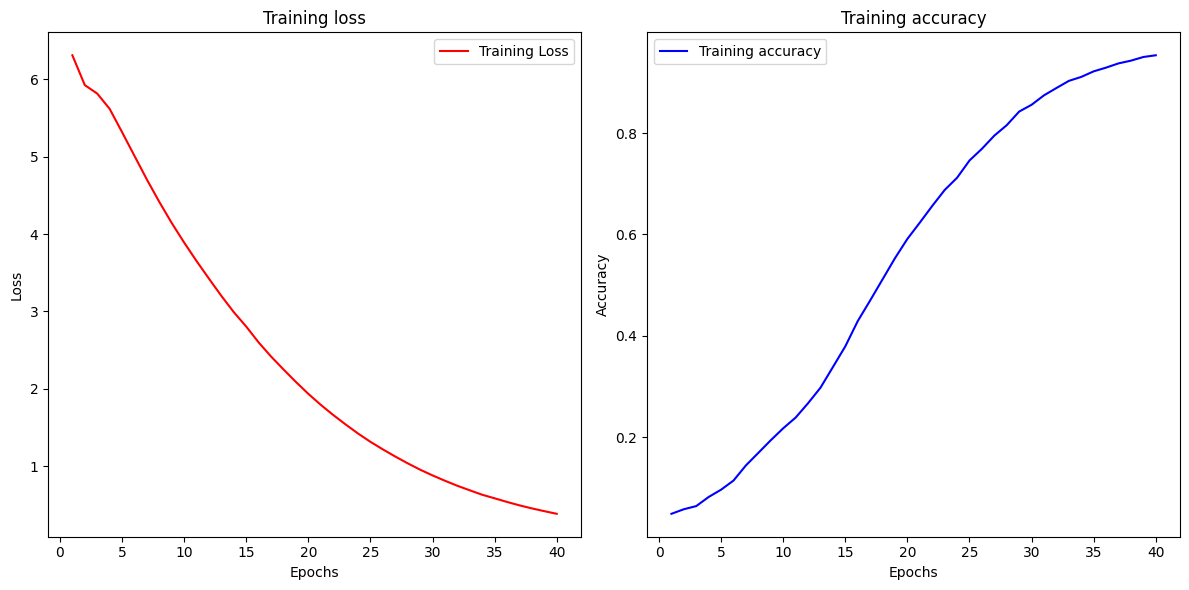

In [71]:
plot_training_history(history)

In [39]:
def generate_text(seed_text, next_words, tokenizer, max_sequence_len, model):
    generated_text = seed_text

    for _ in range(next_words):
        # Convertir le texte semé en une liste de jetons
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Ajouter un rembourrage si nécessaire pour atteindre la longueur maximale de la séquence
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        # Prédire les probabilités des mots suivants
        predicted_probs = model.predict(token_list, verbose=0)
        
        # Trouver l'indice de la classe prédite avec la plus grande probabilité
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        
        # Trouver le mot correspondant à l'indice prédit
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        
        # Ajouter le mot prédit à la séquence générée
        generated_text += " " + output_word
        # Mettre à jour le texte semé pour la prochaine itération
        seed_text = generated_text
    
    return generated_text


In [72]:
# Utilisation de la fonction pour générer du texte
seed_text = "la peur"
next_words = 30
generated_text = generate_text(seed_text, next_words, tokenizer, max_sequence_len, model)
print("seed text : " + str(generated_text) + '...')

seed text : la peur du fait que les hommes se croient libres pour que la nature qu’ils se donne pour visée d’appliquer la méthode géométrique à la philosophie est l’effort vertu à la puissance...


In [74]:
seed_text = "le désir"
next_words = 5
generated_text = generate_text(seed_text, next_words, tokenizer, max_sequence_len, model)
print("seed text : " + str(generated_text) + '...')

seed text : le désir est un effet car la...


In [75]:
seed_text = "le dieu"
next_words = 20
generated_text = generate_text(seed_text, next_words, tokenizer, max_sequence_len, model)
print("seed text : " + str(generated_text) + '...')

seed text : le dieu est également une partie de l’intellect infini de dieu ce qui permet cette belle affirmation dieu constitue la nature de...


In [83]:
def create_lstm_model_more(total_words, max_sequence_len):
    model = Sequential(name="Model_LSTM_Spinoza")
    
    # Couche d'Embedding
    embedding_layer = Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len)
    
    # Ajout des couches au modèle
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(150, return_sequences=True)))
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(total_words, activation='softmax'))
    
    # Utilisation de l'optimiseur legacy pour Macs M1/M2
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Définition de EarlyStopping
    #earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
    
    # Affichage du résumé du modèle
    model.summary()
    
    return model


model_more = create_lstm_model(total_words, max_sequence_len)

Model: "Model_LSTM_Spinoza"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 106, 100)          130200    
                                                                 
 bidirectional_12 (Bidirect  (None, 300)               301200    
 ional)                                                          
                                                                 
 dense_12 (Dense)            (None, 1302)              391902    
                                                                 
Total params: 823302 (3.14 MB)
Trainable params: 823302 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30


41/41 [==============================] - 17s 363ms/step - loss: 6.4206 - accuracy: 0.0529
Epoch 2/30
41/41 [==============================] - 14s 343ms/step - loss: 5.9495 - accuracy: 0.0570
Epoch 3/30
41/41 [==============================] - 14s 333ms/step - loss: 5.9040 - accuracy: 0.0570
Epoch 4/30
41/41 [==============================] - 14s 336ms/step - loss: 5.8566 - accuracy: 0.0581
Epoch 5/30
41/41 [==============================] - 14s 346ms/step - loss: 5.7691 - accuracy: 0.0684
Epoch 6/30
41/41 [==============================] - 14s 333ms/step - loss: 5.6294 - accuracy: 0.0812
Epoch 7/30
41/41 [==============================] - 14s 347ms/step - loss: 5.4627 - accuracy: 0.0917
Epoch 8/30
41/41 [==============================] - 14s 340ms/step - loss: 5.2876 - accuracy: 0.0992
Epoch 9/30
41/41 [==============================] - 15s 366ms/step - loss: 5.1072 - accuracy: 0.1121
Epoch 10/30
41/41 [==============================] - 14s 337ms/step - loss: 4.9344 - accuracy: 0.1305


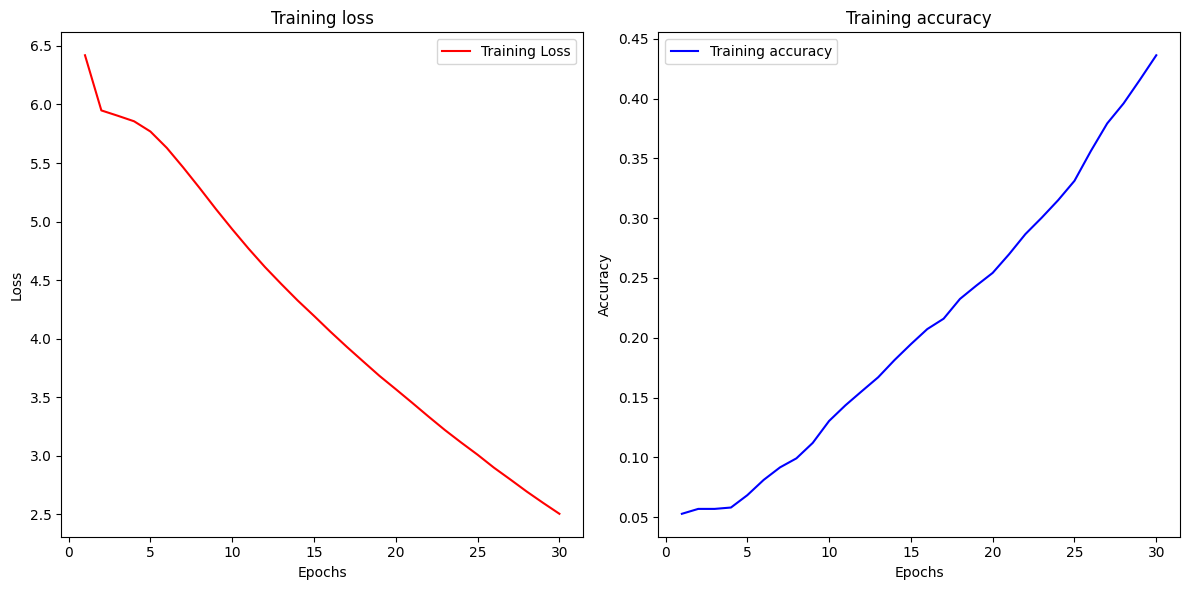

In [84]:
history = model_more.fit(predictors, label, batch_size=150, epochs=30, verbose=1)
plot_training_history(history)